# Setup

In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Projetos/Funcoes

import time

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Projetos/Funcoes


# Try Import

In [ ]:
import importlib
import subprocess
def try_import(module_name,how='',alias=''):
  if how == '':
    try:
      if alias == '':
        print(f'import {module_name}')
        globals()[module_name] = importlib.import_module(module_name)
      else:
        print(f'import {module_name} as {alias}')
        globals()[alias] = importlib.import_module(module_name)
    except Exception as e:
      print(e)
      try:
        subprocess.check_call(["pip", "install", module_name]) #!pip install {module_name}
        print(f'{module_name} installed successfully')
        if alias == '':
          print(f'import {module_name}')
          globals()[module_name] = importlib.import_module(module_name)
        else:
          print(f'import {module_name} as {alias}')
          globals()[alias] = importlib.import_module(module_name)
      except Exception as e:
        print(e)

  elif how == '*':
    try:
      print(f'from {module_name} import *')
      modules = importlib.import_module(module_name)
      globals().update(vars(modules))
    except Exception as e:
      print(e)
      subprocess.check_call(["pip", "install", module_name]) #!pip install {module_name}
      print(f'{module_name} installed successfully')
    finally:
      print(f'from {module_name} import *')
      modules = importlib.import_module(module_name)
      globals().update(vars(modules))
  else:
    print('Nothing to import!')

try_import('gspread_formatting','*')
try_import('chime')
try_import('matplotlib.pyplot',alias='plt')

# Sound Alert

In [ ]:
from google.colab import output
def success1():
  output.eval_js('new Audio("https://ssl.gstatic.com/dictionary/static/pronunciation/2019-10-21/audio/do/done_en_us_1.mp3").play()')

from IPython.display import Audio, display,clear_output
try_import('pydub')
def success2():
  sound_len = len(pydub.AudioSegment.from_wav('files/themes_pokemon_success.wav'))/780
  sound = 
  display(sound)
  time.sleep(sound_len)
  clear_output()

success1()
success2()

from IPython.display import Audio, display
try:
  try_import('chime')
  chime.themes('pokemon')
except Exception as e:
  print(f'Não foi possivel carregar modulo chime: {e}')
def success():
  try:
    chime.success(sync-True,raise_error=True)
  except Exception as e:
    display(Audio('files/themes_pokemon_success.wav', autoplay=True))



import pydub


FileNotFoundError: ignored

# Read Feather

In [ ]:
import os
import pandas as pd
print(f"Raiz Atual: {os.listdir('.')}")

def read_and_create_feather(path_file,sep=','):
  ini = time.perf_counter()
  path = '/'.join(path_file.split('/')[:-1])+'/'
  if path == '/':
    path = './'
  filename = path_file.split('/')[-1]
  file_feather = f'{filename.split(".")[0]}.feather'
  extension = filename.split('.')[-1]
  try:
    base = pd.read_feather(f'{path}{file_feather}')
    print(f'Reading {path}{file_feather} instead')
  except Exception as e:
    if extension == 'csv':
      print(f'Lendo {path_file}')
      base = pd.read_csv(path_file,sep=sep)
    elif extension == 'xlsx':
      print(f'Lendo {path_file}')
      base = pd.read_excel(path_file)
    else:
      print(f'Extension: {extension}. (.csv) or (.xlsx) only.')
      raise e
    base.to_feather(f'{path}{file_feather}')
    print(f'{path}{file_feather} created.')
  return base

read_and_create_feather('Projetos/Funcoes/files/nubank-2022-02.csv')


Raiz Atual: ['Projetos', 'Untitled', 'shell.ipynb']
Path: Projetos/Funcoes/files/
Filename: nubank-2022-02.csv
Reading nubank-2022-02.feather instead
nubank-2022-02.feather created.


,date,category,title,amount
0,2021-12-30,serviços,Pag*Boac Steam 1/3,43.14
1,2022-01-02,NaN,"IOF de ""Patreon* Membership""",1.85
2,2022-01-02,NaN,Pagamento recebido,-165.40
3,2022-01-02,educação,Patreon* Membership,29.02
4,2022-01-03,serviços,Google Storage,69.99
5,2022-01-06,serviços,Google Devsisters,10.99
6,2022-01-06,educação,Amazonprimebr,9.90
7,2022-01-07,serviços,Google Cognosphere,27.90
8,2022-01-21,restaurante,Ifood *Ifood,182.79
9,2022-01-25,serviços,Google Youtube Member,7.99


# Check File Size

In [ ]:
#Single file size
!ls -GFlash "Projetos/Funcoes/files/nubank-2022-02.csv"

512 -rw------- 1 root 467 Mar 14 21:35 Projetos/Funcoes/files/nubank-2022-02.csv


# Imports

In [ ]:
#Python
import pandas as pd
import numpy as np
pd.options.display.max_rows = 500
import os
import re
from datetime import datetime
import importlib
import matplotlib.pyplot as plt
import pydataset as pds

#Google Sheets
from google.colab import auth
import gspread #!pip install --upgrade gspread
import gspread_dataframe as gsdf
from google.auth import default

%load_ext autoreload
%autoreload 2
import funcoes



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# a

In [ ]:
df = pd.DataFrame({'Segmento':[1,1,1,2,2,2],'Cliente1':[10,13,13,11,56,60],'Cliente2':[104,100,98,200,210,251]})
#display(df)
df = df.melt(id_vars=['Segmento'], value_vars=['Cliente1','Cliente2'], var_name='Cliente', value_name='value_name')
df = df.groupby(by=['Segmento','Cliente'])['value_name'].mean().reset_index()
#df = df.pivot(index='Segmento', columns='Cliente', values=['value_name'])
df

,Segmento,Cliente,value_name
0,1,Cliente1,12.000000
1,1,Cliente2,100.666667
2,2,Cliente1,42.333333
3,2,Cliente2,220.333333


In [ ]:
df = pds.data('iris')
print(f'Shape: {df.shape}')
print(f'Shape: {df.Species.value_counts()}')
df = df.groupby(by=['Species'])[	'Sepal.Length',	'Sepal.Width'	,'Petal.Length'	,'Petal.Width'].mean().reset_index()
df

Shape: (150, 5)
Shape: setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


<ipython-input-54-3716f04c50cc>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(by=['Species'])[	'Sepal.Length',	'Sepal.Width'	,'Petal.Length'	,'Petal.Width'].mean().reset_index()


,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


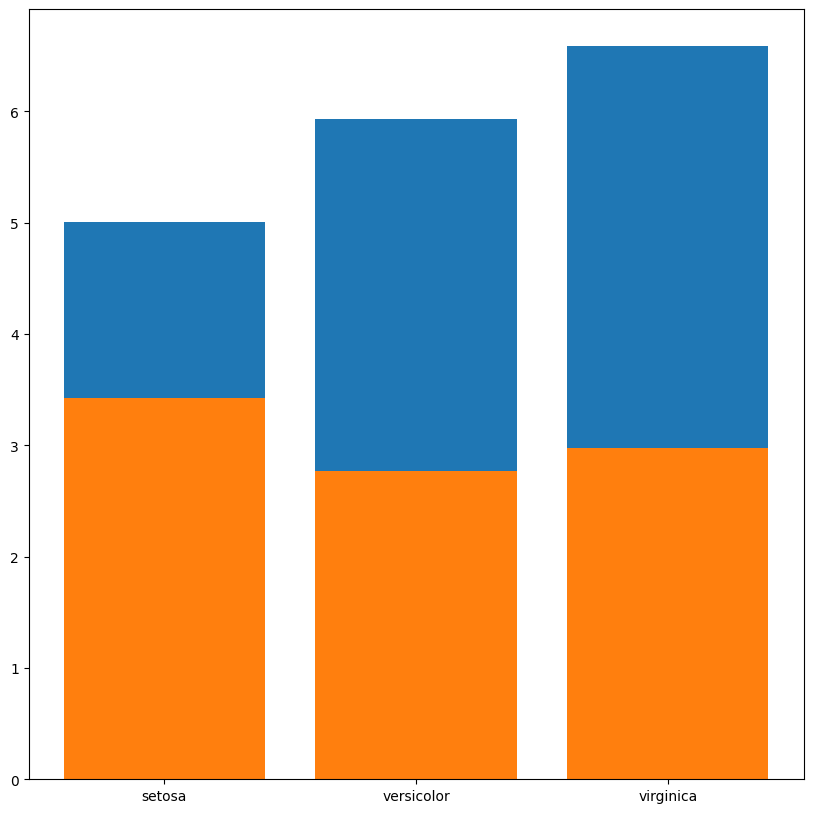

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
X = df['Species']
Y = df['Sepal.Length']
Y2 = df['Sepal.Width']
graph = plt.bar(X,Y)
graph2 = plt.bar(X,Y2)
plt.show()

In [61]:
cache = {}

def fibonacci(n):
    if n in cache:
        return cache[n]
    if n == 0:
        return 0
    if n == 1:
        return 1
    result = fibonacci(n-1) + fibonacci(n-2)
    cache[n] = result
    return result

In [69]:
ini = time.perf_counter()
print("{:.2e}".format(Decimal(fibonacci(5000))))
print(f'{time.perf_counter()-ini} segundos')

3.88e+1044
0.0008135130001392099 segundos
